# Cancer Prediction - Hackaton 2022
___

### Objetivo:

- Understand the dataset and clean it if applicable.

- Build classification models to predict whether the cancer type is malignant or benign, "diagnostic" variable 0 benign and 1 malignant.

- Fit hyperparameters and compare the valuation metrics of various classification algorithms.




___

### Some facts about Breast Cancer:
- Breast cancer is one of the most studied types of cancers.
- Women over 40 years old are at the highest risk of breast cancer.
- According to a study by the University of California, San Francisco, it was concluded that women who have dense breast tissue have a higher risk of developing this type of cancer.
- It is mistakenly believed that this type of cancer only affects women, but it has been proven that men can also develop it, although in a lower percentage.
- It is important to know the difference between a benign tumor and a malignant one. The former are soft, move and can be painful, while malignant tumors are hard, fixed and painless. From the age of 40 it is recommended that mammography, mammography and other additional studies such as breast ultrasound, be performed annually, and even a few years earlier in high-risk women.
- The causes may be due to a high-fat diet, pregnancies at an advanced age or not having pregnancies, addictions such as alcohol and tobacco, starting monthly periods before the age of 12 or having menopause after the age of 55, hormone replacement therapies for a long time, no or little breastfeeding and a sedentary lifestyle are risk factors for developing breast cancer.


___

### Some conciderations to understand the dataset:

The way the dataset is structured was created by Dr. William H. Wolberg, a physician at the University of Wisconsin Hospital in Madison, Wisconsin, USA. To create the dataset, Dr. Wolberg used fluid samples, taken from patients with solid breast masses, and an easy-to-use graphical computer program called Xcyt, capable of performing analysis of cytologic features from a digital scan. The program uses a curve fitting algorithm, to calculate ten features for each of the cells in the sample, which calculates the mean value, extreme value and standard error of each feature for the image, returning a vector of 30 real values-

Attribute information:

- diagnosis: 0 tumor is benign, 1 tumor is malignant.

- radius (mean of the distances from the center to the perimeter points)
- texture (standard deviation of the grayscale values)
- perimeter
- area
- smoothness (local variation of the lengths of the radius)
- compactness (perimeter² / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("approximation of the coastline" - 1)

For each image, the mean, standard error and "worst" or largest (mean of the three largest values) of these features were calculated, resulting in 30 features.



___

## EDA - Exploratory Data Analysis:


In [1]:
#Import the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, make_scorer
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


___

In [3]:
#Import the DataSet:
df= pd.read_csv('cancer-train.csv')
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          0        10.71         20.39           69.50      344.9   
1          0        13.64         16.34           87.21      571.8   
2          0        11.71         17.19           74.68      420.3   
3          1        15.30         25.27          102.40      732.4   
4          1        14.45         20.22           94.49      642.7   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.10820           0.12890         0.08448              0.02867   
1          0.07685           0.06059         0.01857              0.01723   
2          0.09774           0.06141         0.03809              0.03239   
3          0.10820           0.16970         0.16830              0.08751   
4          0.09872           0.12060         0.11800              0.05980   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.1668  ...         11.69          25.21            76.51   
1         0.1353  ...         14.67          23.19            96.08   
2         0.1516  ...         13.01          21.39            84.42   
3         0.1926  ...         20.27          36.71           149.30   
4         0.1950  ...         18.33          30.12           117.90   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       410.4            0.1335             0.2550           0.2534   
1       656.7            0.1089             0.1582           0.1050   
2       521.5            0.1323             0.1040           0.1521   
3      1269.0            0.1641             0.6110           0.6335   
4      1044.0            0.1552             0.4056           0.4967   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.08600          0.2605                  0.08701  
1               0.08586          0.2346                  0.08025  
2               0.10990          0.2572                  0.07097  
3               0.20240          0.4027                  0.09876  
4               0.18380          0.4753                  0.10130  

[5 rows x 31 columns]

In [35]:
df.shape

(455, 31)

In [4]:
#Some statics from our Data Set:
df.describe().round(2).T

count    mean     std     min     25%     50%  \
diagnosis                455.0    0.37    0.48    0.00    0.00    0.00   
radius_mean              455.0   14.14    3.63    6.98   11.70   13.30   
texture_mean             455.0   19.31    4.27    9.71   16.21   18.89   
perimeter_mean           455.0   92.09   25.00   43.79   75.02   85.98   
area_mean                455.0  657.83  363.54  143.50  419.25  546.40   
smoothness_mean          455.0    0.10    0.01    0.05    0.09    0.10   
compactness_mean         455.0    0.11    0.05    0.02    0.07    0.09   
concavity_mean           455.0    0.09    0.08    0.00    0.03    0.06   
concave points_mean      455.0    0.05    0.04    0.00    0.02    0.03   
symmetry_mean            455.0    0.18    0.03    0.12    0.16    0.18   
fractal_dimension_mean   455.0    0.06    0.01    0.05    0.06    0.06   
radius_se                455.0    0.40    0.29    0.11    0.23    0.32   
texture_se               455.0    1.21    0.52    0.36    0.84    1.11   
perimeter_se             455.0    2.85    2.09    0.76    1.60    2.24   
area_se                  455.0   40.40   47.69    6.80   17.70   24.28   
smoothness_se            455.0    0.01    0.00    0.00    0.01    0.01   
compactness_se           455.0    0.03    0.02    0.00    0.01    0.02   
concavity_se             455.0    0.03    0.03    0.00    0.02    0.03   
concave points_se        455.0    0.01    0.01    0.00    0.01    0.01   
symmetry_se              455.0    0.02    0.01    0.01    0.01    0.02   
fractal_dimension_se     455.0    0.00    0.00    0.00    0.00    0.00   
radius_worst             455.0   16.28    4.90    7.93   12.98   14.99   
texture_worst            455.0   25.82    6.12   12.02   21.35   25.44   
perimeter_worst          455.0  107.32   34.03   50.41   84.29   97.66   
area_worst               455.0  882.55  574.72  185.20  513.95  688.60   
smoothness_worst         455.0    0.13    0.02    0.08    0.12    0.13   
compactness_worst        455.0    0.26    0.16    0.03    0.15    0.22   
concavity_worst          455.0    0.28    0.21    0.00    0.12    0.23   
concave points_worst     455.0    0.12    0.07    0.00    0.07    0.10   
symmetry_worst           455.0    0.29    0.06    0.16    0.25    0.28   
fractal_dimension_worst  455.0    0.08    0.02    0.06    0.07    0.08   

                             75%      max  
diagnosis                   1.00     1.00  
radius_mean                15.74    28.11  
texture_mean               21.80    39.28  
perimeter_mean            103.65   188.50  
area_mean                 777.25  2501.00  
smoothness_mean             0.11     0.16  
compactness_mean            0.13     0.35  
concavity_mean              0.13     0.43  
concave points_mean         0.07     0.20  
symmetry_mean               0.20     0.30  
fractal_dimension_mean      0.07     0.10  
radius_se                   0.48     2.87  
texture_se                  1.47     3.65  
perimeter_se                3.28    21.98  
area_se                    45.30   542.20  
smoothness_se               0.01     0.03  
compactness_se              0.03     0.14  
concavity_se                0.04     0.40  
concave points_se           0.01     0.05  
symmetry_se                 0.02     0.08  
fractal_dimension_se        0.00     0.03  
radius_worst               18.55    36.04  
texture_worst              29.99    49.54  
perimeter_worst           124.95   251.20  
area_worst               1047.00  4254.00  
smoothness_worst            0.15     0.22  
compactness_worst           0.33     1.06  
concavity_worst             0.39     1.25  
concave points_worst        0.16     0.29  
symmetry_worst              0.32     0.58  
fractal_dimension_worst     0.09     0.21

In [5]:
#Information and type of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                455 non-null    int64  
 1   radius_mean              455 non-null    float64
 2   texture_mean             455 non-null    float64
 3   perimeter_mean           455 non-null    float64
 4   area_mean                455 non-null    float64
 5   smoothness_mean          455 non-null    float64
 6   compactness_mean         455 non-null    float64
 7   concavity_mean           455 non-null    float64
 8   concave points_mean      455 non-null    float64
 9   symmetry_mean            455 non-null    float64
 10  fractal_dimension_mean   455 non-null    float64
 11  radius_se                455 non-null    float64
 12  texture_se               455 non-null    float64
 13  perimeter_se             455 non-null    float64
 14  area_se                  4

In [6]:
#Check the null values:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

___

### As we have already checked that our dataset has no null values, we will use all the records to work and later train the Machine Learning Model and see what results we get.

___

In [7]:
#Counting the values for each class:
total_classes= df['diagnosis'].value_counts()
total_classes

0    285
1    170
Name: diagnosis, dtype: int64

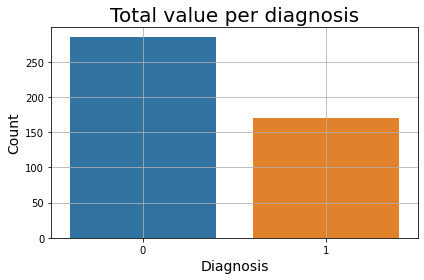

In [62]:
# Analyzing the target variable

#Set colors of each bar
c = ['green', 'red']

sns.countplot(df['diagnosis'])
plt.title("Total value per diagnosis",fontsize=20)

plt.ylabel("Count", fontsize=14)
plt.xlabel("Diagnosis", fontsize=14)

plt.grid()
plt.tight_layout()
plt.show()



The graph shows that we have more data on benign tumors than malignant tumors. 

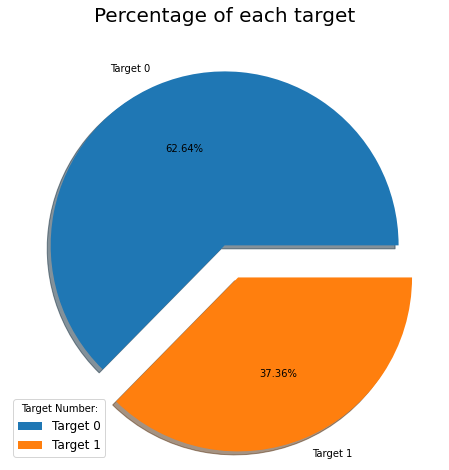

In [11]:
#Donut Chart with the total of each cluster.
plt.figure(figsize=(8,8))
labels = ["Target 0", "Target 1"]
explode = [0,0.2]
plt.pie(total_classes, labels = labels, autopct='%.2f%%', explode=explode, shadow=True)

plt.title("Percentage of each target",fontsize=20)
plt.legend(title= "Target Number:", fontsize=12, loc="best")

plt.show()

As in the graph above, here we show the percentage in which our classes are unbalanced.

___

### Even if our classes are unbalanced, I will not impute other data since, as we are working on sensitive information, it can lead to a greater bias. Later on, they are taken into account when dividing our dataset, which was applied using a stratified sampling method.
___

In [43]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

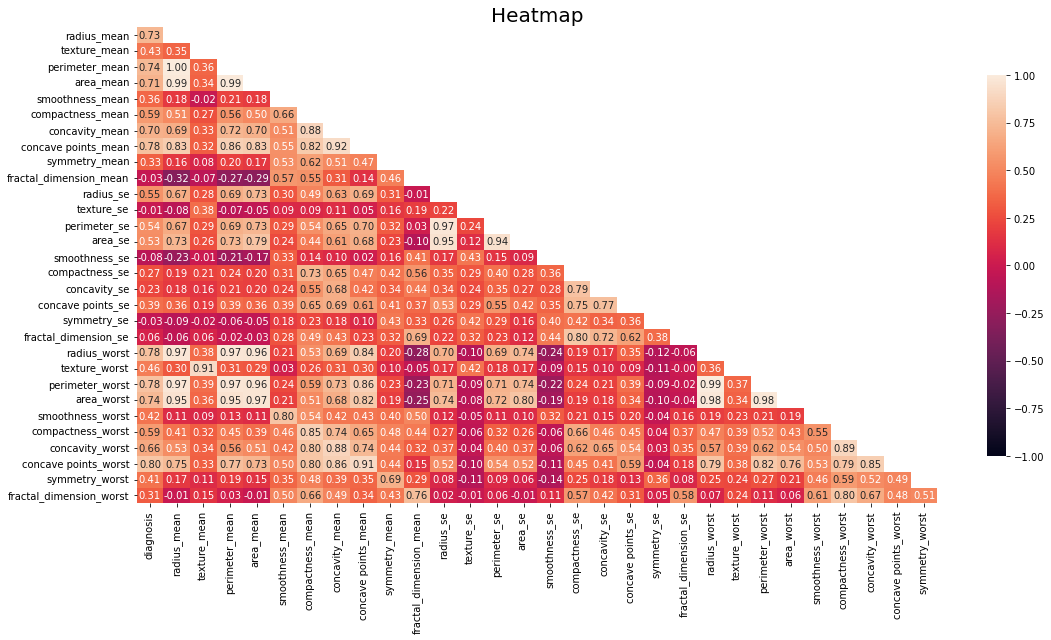

In [82]:
#Correlation:
corr = df.corr()

#Lets plot a HeatMap:
np.ones_like(corr, dtype=bool)
mask = np.triu(np.ones_like(corr, dtype=bool))
corr
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(corr, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = corr.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap",  fontsize=20)
plt.tight_layout()
plt.show()

This heat plot shows the correlation of our variables where the values can oscillate between -1 and 1, being positive correlation if it is greater than 0 or negative correlation if it is less than 0. Positive correlation means that when a value of our column increases, the columns with positive correlation on it will also increase, but if they have negative correlation when one value increases the other decreases.
In this way we can easily know which columns correlate more than others.

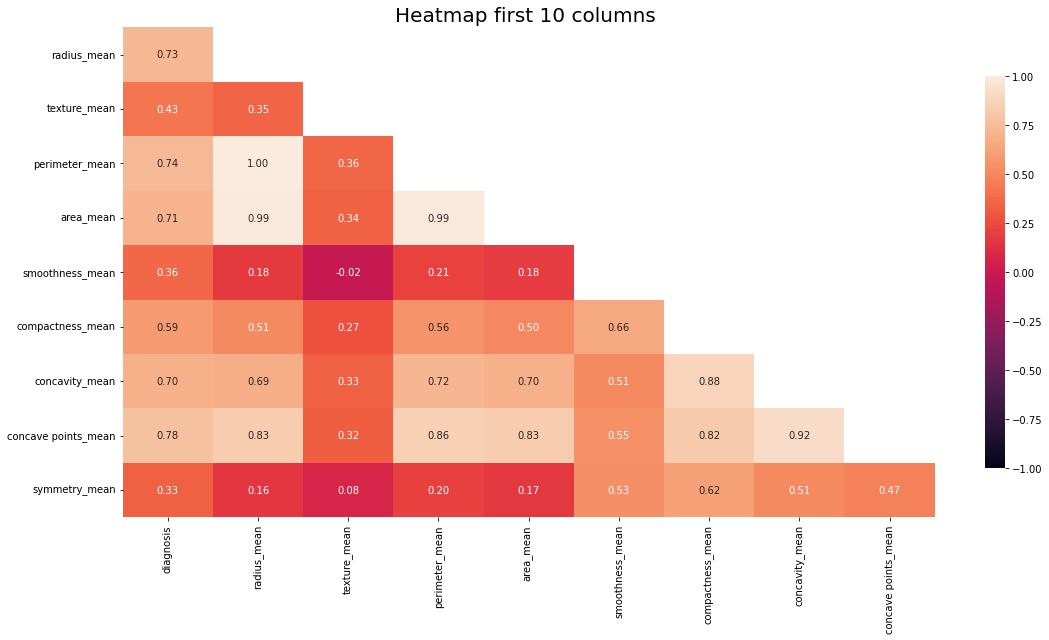

In [91]:
#topelation:
top = df.iloc[:,:10]
top = top.corr()

#Lets plot a HeatMap:
np.ones_like(top, dtype=bool)
mask = np.triu(np.ones_like(top, dtype=bool))
top
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(top, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

top = top.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(top, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap first 10 columns ",  fontsize=20)
plt.tight_layout()
plt.show()

Here we see better how our variables are related, what is curious is that only one value has a negative correlation, one could almost say that it is neutral because the value is close to 0. But most of the columns have positive correlation and are strongly correlated with each other, which is very interesting when making a machine learning model and gives us good indications that we can get good results.
___

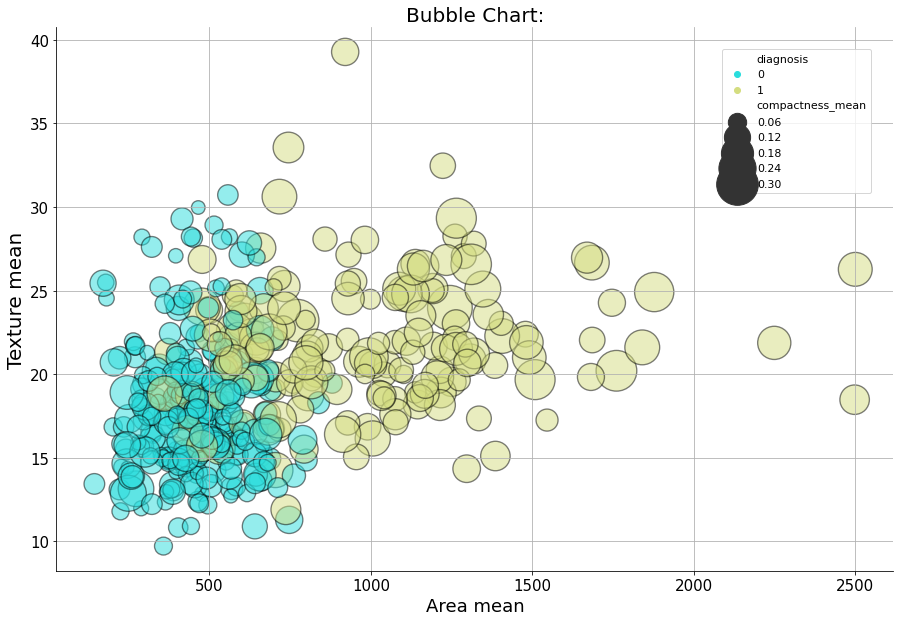

In [81]:
#Variable
data = df

#Setting the size of the chart.
plt.figure(figsize = (15,10))

#Setting the type of chart.
ax = sns.scatterplot(data=data, x="area_mean", y="texture_mean",
                    size="compactness_mean",
                    sizes=(100,2000),
                    alpha=0.5,
                    hue="diagnosis",
                    #hue_order=['0', '1'],
                    palette="rainbow",
                    edgecolor="black",
                    )

#Setting others parameters
plt.legend(title="Diagnosis", loc='best', fontsize= 16)    
plt.legend(bbox_to_anchor=(1, 1),loc='best', fontsize=11, borderaxespad=2)

plt.title("Bubble Chart:", fontsize=20)
plt.xlabel("Area mean", fontsize= 18, color="black")
plt.ylabel("Texture mean", fontsize= 20, color="black")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
#plt.savefig('bubble_chart.png')


plt.show()

Texture analysis can provide a localized description of breast cancer, with particular emphasis on quantifying breast lesion heterogeneity. In this case we can conclude that the smaller the lesion in the breast, with special emphasis on the quantification of the heterogeneity of breast lesions, the smaller the tumor area, and also in these values are usually found benign tumors.
And the larger the area of the tumor, the smaller the lesion texture, these are the points that are located along the graph, and that are mostly represented as a characteristic of malignant tumors.
The size of the bubble indicates how compact the tumor is.

___

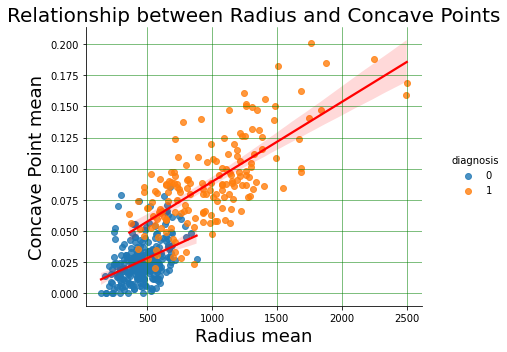

In [104]:
#plt.figure(figsize =(20, 8))

sns.lmplot(data=df, x='area_mean', y='concave points_mean',hue="diagnosis", fit_reg=True, line_kws=dict(color="red"))

plt.title("Relationship between Radius and Concave Points",fontsize=20)
plt.xlabel("Radius mean", fontsize=18)
plt.ylabel("Concave Point mean", fontsize=18)
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.tight_layout()

plt.show()


Clearly we have a positive trend between the average number of concave points and the average radius in both benign and malignant tumors. Although we must make a difference here, most benign tumors are between the following values, 0.070 Concave Points and 700 Radius.
While malignant tumors are in the area of 0.060 Concave Points and 800 Radius, and as one measure increases so does the other. 

___

Some analysis of each column:

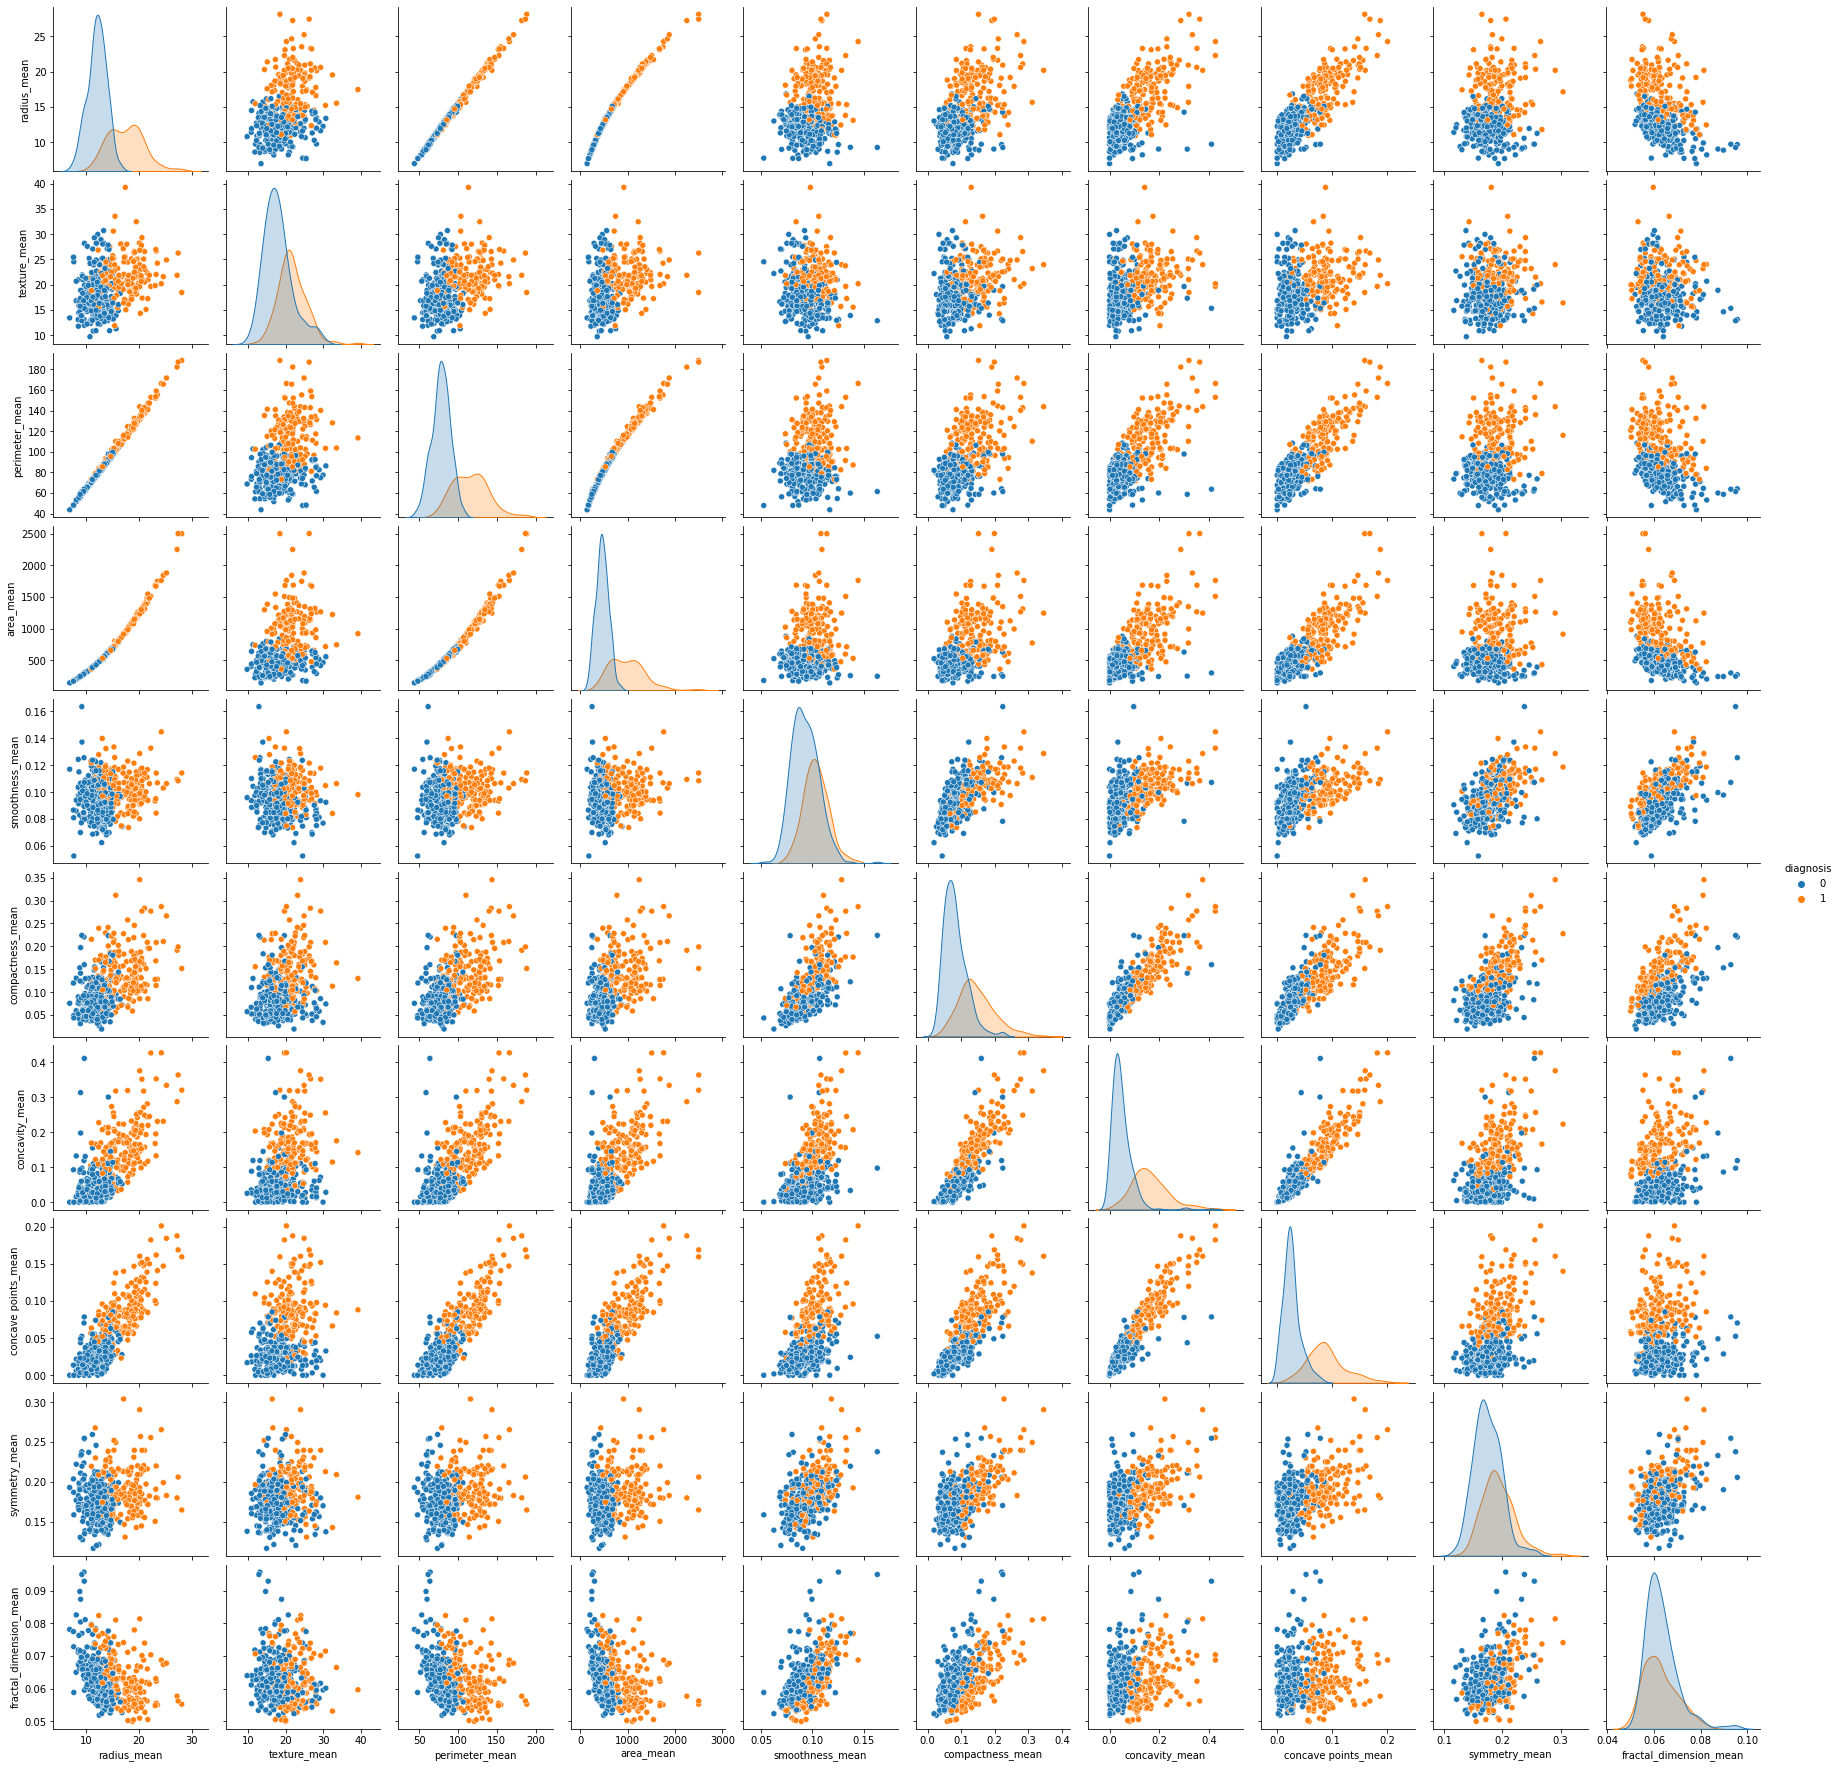

In [105]:
#generate a scatter plot with the following columns:

columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data=df[columns], hue="diagnosis")

___

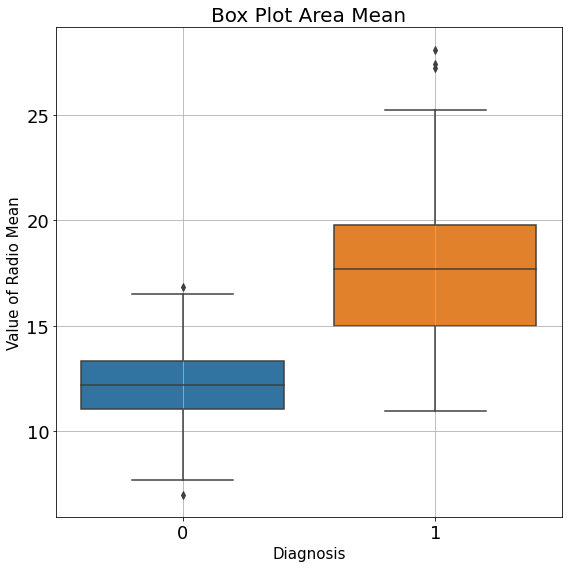

In [128]:
#Check the values of Area:
fig = plt.figure(figsize=(8,8))

#Boxplot
sns.boxplot(x=df.diagnosis, y=df.radius_mean) 

plt.title('Box Plot Area Mean', fontsize=20)
plt.xlabel("Diagnosis",fontsize=15)
plt.ylabel("Value of Radio Mean", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)



plt.tight_layout()
plt.grid()
plt.show()

We see here that we do not have so many outliers for each class . The boxplot allows us to easily see these values, as well as the quartiles that are the extremes of each box and the average that would be the line that divides each box and the outliers are plotted as points.

___

 ## Predictive Model
Once we checked and analyzed the data. We will now consider the problem we want to solve.
 As we are facing a classification problem, where we are going to train our algorithm with the Train dataset and then give as input the Test dataset to predict our target (type of tumor).
 In this case I will use the CatBoost Classifier algorithm. This model works very well because it is very fast to process data and very accurate.

In [15]:
#Split the data between X and Y.

X = df.drop(['diagnosis'], axis= 1)
y = df['diagnosis']

print(X.shape)
print(y.shape)

(455, 30)
(455,)


In [117]:
#Split the DataSet between Train and Test, with stratified sampling method and train with 80%:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [26]:
#Create an object with our CatBoost Model

model = CatBoostClassifier()
model.fit(X_train, y_train)

#Lets predict some values:
model_pred =model.predict(X_test)

#Evaluate our Model
print("Accuracy:",metrics.accuracy_score(y_test, model_pred))
# Precision: 
precision_model = precision_score(model_pred, y_test, average='macro')
print('Precision:', precision_model)
# Recall: 
recall_model = recall_score(model_pred, y_test, average='macro')
print('Recall:', recall_model)
# f1 score
f1_model = f1_score(model_pred, y_test, average='macro')
print('F1:', f1_model)

Learning rate set to 0.006692
0:	learn: 0.6831275	total: 25.4ms	remaining: 25.4s
1:	learn: 0.6729867	total: 45.9ms	remaining: 22.9s
2:	learn: 0.6626945	total: 62.7ms	remaining: 20.8s
3:	learn: 0.6529116	total: 94.4ms	remaining: 23.5s
4:	learn: 0.6418021	total: 137ms	remaining: 27.3s
5:	learn: 0.6334737	total: 159ms	remaining: 26.4s
6:	learn: 0.6222362	total: 205ms	remaining: 29s
7:	learn: 0.6126323	total: 232ms	remaining: 28.7s
8:	learn: 0.6019788	total: 258ms	remaining: 28.4s
9:	learn: 0.5944294	total: 270ms	remaining: 26.8s
10:	learn: 0.5859322	total: 287ms	remaining: 25.8s
11:	learn: 0.5780868	total: 327ms	remaining: 27s
12:	learn: 0.5711779	total: 373ms	remaining: 28.3s
13:	learn: 0.5627587	total: 388ms	remaining: 27.4s
14:	learn: 0.5552230	total: 412ms	remaining: 27.1s
15:	learn: 0.5469734	total: 436ms	remaining: 26.8s
16:	learn: 0.5404428	total: 455ms	remaining: 26.3s
17:	learn: 0.5329413	total: 466ms	remaining: 25.4s
18:	learn: 0.5253721	total: 475ms	remaining: 24.5s
19:	learn: 

___
## CatBoost Classifier Pipeline:

In [118]:
# Preprocedado
# ==============================================================================

# DataFrame with numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Apply Robust Scaler to the numerical variables
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Combining the steps and create a Pipeline

pipe = Pipeline([('preprocessing', preprocessor),
                ('data_scaling',numeric_transformer),
                ('model',CatBoostClassifier(od_type = "IncToDec", od_wait = 100, od_pval=0))])

# Train
# ==============================================================================
# Fit the data
_ = pipe.fit(X=X_train, y=y_train)


#Predict the result:
pipe_pred = pipe.predict(X_test)

#Veamos las metricas de evaluación que obtuvimos:

print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred))
# Precision: 
precision_pipe = precision_score(pipe_pred, y_test, average='macro')
print('Precision:', precision_pipe)
# Recall: 
recall_pipe = recall_score(pipe_pred, y_test, average='macro')
print('Recall:', recall_pipe)
# f1 score
f1_pipe = f1_score(pipe_pred, y_test, average='macro')
print('F1:', f1_pipe)

Learning rate set to 0.006692
0:	learn: 0.6831275	total: 23.5ms	remaining: 23.5s
1:	learn: 0.6729867	total: 53.5ms	remaining: 26.7s
2:	learn: 0.6626945	total: 117ms	remaining: 39s
3:	learn: 0.6529116	total: 128ms	remaining: 31.8s
4:	learn: 0.6418021	total: 143ms	remaining: 28.4s
5:	learn: 0.6334737	total: 162ms	remaining: 26.9s
6:	learn: 0.6222362	total: 171ms	remaining: 24.3s
7:	learn: 0.6126323	total: 188ms	remaining: 23.3s
8:	learn: 0.6019788	total: 198ms	remaining: 21.8s
9:	learn: 0.5944294	total: 205ms	remaining: 20.3s
10:	learn: 0.5859322	total: 212ms	remaining: 19s
11:	learn: 0.5780868	total: 222ms	remaining: 18.3s
12:	learn: 0.5711779	total: 230ms	remaining: 17.5s
13:	learn: 0.5627587	total: 245ms	remaining: 17.3s
14:	learn: 0.5552230	total: 262ms	remaining: 17.2s
15:	learn: 0.5469734	total: 278ms	remaining: 17.1s
16:	learn: 0.5404428	total: 296ms	remaining: 17.1s
17:	learn: 0.5329413	total: 315ms	remaining: 17.2s
18:	learn: 0.5253721	total: 329ms	remaining: 17s
19:	learn: 0.51

___

In [119]:
#5 cross-validation scores:
pipe_cv = cross_val_score(pipe,X,y,cv=5, scoring='f1_macro',  error_score='raise' ) 

#Show the values:
print(pipe_cv)
print("Average 5-Fold CV Score: {}".format(np.mean(pipe_cv)))
print('F1 First model:', f1_pipe)

Learning rate set to 0.006692
0:	learn: 0.6831720	total: 11.4ms	remaining: 11.3s
1:	learn: 0.6726099	total: 20.8ms	remaining: 10.4s
2:	learn: 0.6628094	total: 30.3ms	remaining: 10.1s
3:	learn: 0.6529521	total: 38.8ms	remaining: 9.66s
4:	learn: 0.6424194	total: 46.7ms	remaining: 9.3s
5:	learn: 0.6332239	total: 56.5ms	remaining: 9.36s
6:	learn: 0.6227639	total: 64.6ms	remaining: 9.16s
7:	learn: 0.6133354	total: 71.5ms	remaining: 8.87s
8:	learn: 0.6027424	total: 80.5ms	remaining: 8.87s
9:	learn: 0.5946247	total: 98.4ms	remaining: 9.74s
10:	learn: 0.5866098	total: 123ms	remaining: 11s
11:	learn: 0.5778389	total: 157ms	remaining: 12.9s
12:	learn: 0.5699407	total: 173ms	remaining: 13.1s
13:	learn: 0.5611499	total: 183ms	remaining: 12.9s
14:	learn: 0.5534402	total: 195ms	remaining: 12.8s
15:	learn: 0.5446864	total: 206ms	remaining: 12.7s
16:	learn: 0.5381567	total: 219ms	remaining: 12.7s
17:	learn: 0.5310571	total: 234ms	remaining: 12.7s
18:	learn: 0.5238662	total: 246ms	remaining: 12.7s
19:	

We have our model a bit overfitting, lets change some parameter to see if we can improve the model.

___

### Changing some Hyperparameters of our Pipeline with Grid Search:

In [33]:
# Change some hyperparameters to optimize the model and find the best ones:

parametros = { 'model__n_estimators': (100,200,300),
                'model__depth': [4, 6, 10],
                'model__l2_leaf_reg': [1, 5, 7, 9]}

pipe_grid = GridSearchCV(pipe, parametros,
                    verbose=True,
                    cv=5,
                    scoring='f1_macro')          

#Fit the model
pipe_grid.fit(X_train, y_train)

#Predict after Grid Search:
pipe_pred_gs = pipe_grid.predict(X_test)

#Cross validation
#Random Forest after Grid Search
#pipe_grid_cv = cross_val_score(pipe_grid,X,y,
#                               cv=5,
#                               scoring='f1_macro',
 #                              error_score='raise' ) 

#print("Average 5-Fold CV Score: {}".format(np.mean(pipe_grid_cv)))

#=======================================================================

# Evaluate the model:

#Accuracy:
print("Accuracy:",metrics.accuracy_score(y_test, pipe_pred_gs))

# Precision: 
precision_pipe_grid = precision_score(pipe_pred_gs, y_test, average='macro')
print('Precision:', precision_pipe_grid)

# Recall: 
recall_pipe_grid = recall_score(pipe_pred_gs, y_test, average='macro')
print('Recall:', recall_pipe_grid)

#F1 Macro:
f1_pipe_grid = f1_score(pipe_pred_gs, y_test, average='macro')
rf_best_params = pipe_grid.best_params_

print('F1 First model:', f1_pipe)
print('F1 Macro after Grid Search:', f1_pipe_grid)
print('Best Parameters: ', pipe_grid.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6530148	total: 11.5ms	remaining: 1.14s
1:	learn: 0.5992418	total: 16.2ms	remaining: 793ms
2:	learn: 0.5561792	total: 21.3ms	remaining: 687ms
3:	learn: 0.5271968	total: 25.7ms	remaining: 616ms
4:	learn: 0.4914647	total: 31ms	remaining: 589ms
5:	learn: 0.4617577	total: 44.6ms	remaining: 699ms
6:	learn: 0.4373913	total: 50.9ms	remaining: 676ms
7:	learn: 0.4119372	total: 58.3ms	remaining: 670ms
8:	learn: 0.3912652	total: 63.6ms	remaining: 644ms
9:	learn: 0.3699225	total: 70.2ms	remaining: 632ms
10:	learn: 0.3450513	total: 75.5ms	remaining: 611ms
11:	learn: 0.3273052	total: 80.7ms	remaining: 592ms
12:	learn: 0.3106387	total: 87.2ms	remaining: 584ms
13:	learn: 0.2939388	total: 91.2ms	remaining: 560ms
14:	learn: 0.2791804	total: 94ms	remaining: 533ms
15:	learn: 0.2684081	total: 97.9ms	remaining: 514ms
16:	learn: 0.2542754	total: 107ms	remaining: 523ms
17:	learn: 0.2444521	total: 114ms	remaining: 519ms
18:	learn: 0.22899

### We cound´t improve our model to solve our small underfitting, but we obtain very good results.

___

Lets see the results with our Train set in a Confusion Matrix:

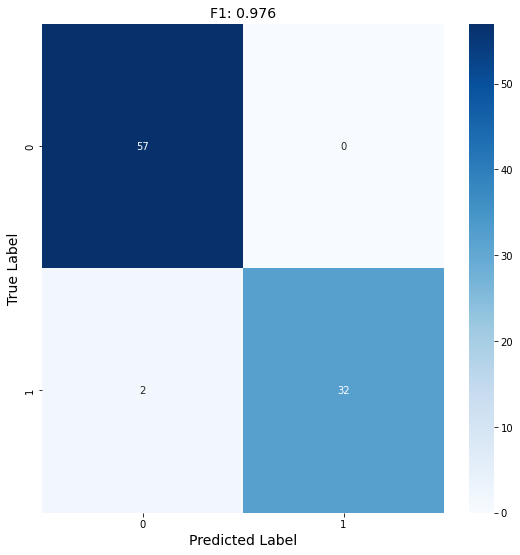

In [21]:
#Confusion Matrix:
cm_rf = confusion_matrix(y_test, pipe_pred)

#Confusion Matrix Plot:
plt.figure(figsize=(9,9))


ax = sns.heatmap(cm_rf, annot=True, fmt='', cmap='Blues')

title = 'F1: {0}'.format(f1_pipe.round(3))
ax.set_title(title, fontsize=14);


ax.set_xlabel('Predicted Label',fontsize=14)
ax.set_ylabel('True Label', fontsize=14);



##Mostramos la matriz.
plt.show()

Here we can see that the main diagonal shows the successes that the model had in classifying our target. While the other data correspond to what the algorithm predicted wrong.

___
## Now we are going to train our model with all the data to Predict the results of the TEST dataset:

In [120]:
#First import our Test DataSet:
df_test = pd.read_csv('cancer-test.csv')
df_test.head()


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        14.02         15.66           89.59      606.5          0.07966   
1        11.20         29.37           70.67      386.0          0.07449   
2        13.47         14.06           87.32      546.3          0.10710   
3        25.73         17.46          174.20     2010.0          0.11490   
4        10.86         21.48           68.51      360.5          0.07431   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.05581         0.02087              0.02652         0.1589   
1           0.03558         0.00000              0.00000         0.1060   
2           0.11550         0.05786              0.05266         0.1779   
3           0.23630         0.33680              0.19130         0.1956   
4           0.04227         0.00000              0.00000         0.1661   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.05586  ...         14.91          19.31            96.53   
1                 0.05502  ...         11.92          38.30            75.19   
2                 0.06639  ...         14.83          18.32            94.94   
3                 0.06121  ...         33.13          23.58           229.30   
4                 0.05948  ...         11.66          24.77            74.08   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0       688.9           0.10340            0.10170           0.0626   
1       439.6           0.09267            0.05494           0.0000   
2       660.2           0.13930            0.24990           0.1848   
3      3234.0           0.15300            0.59370           0.6451   
4       412.3           0.10010            0.07348           0.0000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0               0.08216          0.2136                  0.06710  
1               0.00000          0.1566                  0.05905  
2               0.13350          0.3227                  0.09326  
3               0.27560          0.3690                  0.08815  
4               0.00000          0.2458                  0.06592  

[5 rows x 30 columns]

Same Pipeline but fitted and trained with all the data:

In [121]:
# Preprocessing
# ==============================================================================

# DataFrame with numeric columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Apply Robust Scaler to the numerical variables
numeric_transformer = Pipeline(
                        steps=[('scaler', RobustScaler())]
                      )


preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Combining the steps and create a Pipeline

pipe = Pipeline([('preprocessing', preprocessor),
                ('data_scaling',numeric_transformer),
                ('model',CatBoostClassifier(od_type = "IncToDec", od_wait = 100, od_pval=0))])

# Train
# ==============================================================================
# Fit the data
_ = pipe.fit(X=X, y=y)


Learning rate set to 0.00736
0:	learn: 0.6800206	total: 21.4ms	remaining: 21.4s
1:	learn: 0.6676853	total: 37ms	remaining: 18.5s
2:	learn: 0.6560686	total: 61.9ms	remaining: 20.6s
3:	learn: 0.6454135	total: 75.2ms	remaining: 18.7s
4:	learn: 0.6340194	total: 89ms	remaining: 17.7s
5:	learn: 0.6250291	total: 98.4ms	remaining: 16.3s
6:	learn: 0.6132425	total: 111ms	remaining: 15.8s
7:	learn: 0.6032259	total: 125ms	remaining: 15.5s
8:	learn: 0.5909309	total: 135ms	remaining: 14.9s
9:	learn: 0.5811942	total: 152ms	remaining: 15s
10:	learn: 0.5720791	total: 175ms	remaining: 15.7s
11:	learn: 0.5623845	total: 182ms	remaining: 15s
12:	learn: 0.5544301	total: 190ms	remaining: 14.4s
13:	learn: 0.5454350	total: 197ms	remaining: 13.9s
14:	learn: 0.5368792	total: 207ms	remaining: 13.6s
15:	learn: 0.5279731	total: 228ms	remaining: 14s
16:	learn: 0.5201876	total: 242ms	remaining: 14s
17:	learn: 0.5119002	total: 272ms	remaining: 14.8s
18:	learn: 0.5050575	total: 326ms	remaining: 16.8s
19:	learn: 0.49621

In [122]:
#Predict the result:
pipe_pred = pipe.predict(df_test)

In [126]:
#Create the Dataframe with the results:
predictions= pipe_pred
predictions=pd.DataFrame({'Predicted Diagnosis':predictions})
predictions

Predicted Diagnosis
0                      0
1                      0
2                      0
3                      1
4                      0
..                   ...
109                    0
110                    0
111                    0
112                    1
113                    0

[114 rows x 1 columns]

In [127]:
# Save the DataFrame with the predictions:

predictions.to_csv('predictions.csv', header=True, index=True)


___
### Final Conlusion: 

- Different types of algorithms were tested such as, Random Forest Classifier,AdaBoostClassifier, KNeighbors Classifier, Logistic Regression, etc. The best F1 macro result was obtained with the CatBoost Classifier, with a result of 0.976 wich was a bit underfitted but it´s a very good result.

- By having strongly correlated variables, it was possible to obtain good results, which also indicates that the quality of the data was also good.

- Although this usually gives good predictions when classifying a tumor as benign or malignant, this should not be considered as absolute truth, but a tool on which to rely so that they can reach an accurate conclusion. This does not speak of certainties but of the probability that there is (according to the data previously obtained and analyzed) that a tumor is benign or malignant.

- There is a strong correlation between tumor texture damage and tumor size area. The larger the area of the tumor, the smaller the lesion texture

- There is a positive trend between the average number of concave points and the average radius in both benign and malignant tumors. Benign tumors are located in an area where the values of both features are lower while malignant tumors have higher values.

## Proposed Solution:
- A web page should be created so that the Machine Learning Model can be deployed, and anyone who has their mammography results, but above all doctors, can interact and upload the data to obtain a prediction of the type of tumor that is being analyzed.

- New technologies such as Machine Learning and artificial intelligence can serve as a diagnostic tool.

___


___

#### Documentation:

- Cancer Breast Data : https://www.ngenespanol.com/ciencia/informacion-sobre-el-cancer-de-mama/
- DataSet = Dataset given by Nuwe CancerPrediction-Hackaton: https://nuwe.io/challenge/repte-4-models-de-classificacio
- Cancer Breast DataSet explanation : http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29
- CatBoost Classifier: https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier
- SKLearn Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html